In [2]:
!pip install numpy

!pip install pandas

!pip install tensorflow

!pip install keras

!pip install matplotlib

!pip install gensim


In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

import warnings
warnings.filterwarnings('ignore')

In [4]:
categories = ['SRN('+str(i)+')' for i in range(1, 58)]

In [5]:
datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

training_set = datagen.flow_from_directory(
        "/content/SignatureBasedDocumentRetrieval/Dataset/57Sets",
        target_size=(64, 64),
        batch_size=32,
        class_mode="categorical",
        classes = categories
      )

Found 5785 images belonging to 57 classes.


In [6]:
datagen1 = ImageDataGenerator(rescale=1./255)

test_set = datagen1.flow_from_directory(
        "/content/SignatureBasedDocumentRetrieval/Dataset/57Sets",
        target_size=(64, 64),
        batch_size=32,
        class_mode="categorical",
        classes=categories

      )

Found 5785 images belonging to 57 classes.



Building different layers of CNN

In [7]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(Dense(57, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation ='softmax'))

In [8]:

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [9]:
cnn.compile(optimizer = 'adam', loss ='categorical_crossentropy', metrics = ['accuracy'])
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10
181/181 [==============================] - 23s 119ms/step - loss: 3.9339 - accuracy: 0.0999 - val_loss: 2.6007 - val_accuracy: 0.3409
Epoch 2/10
181/181 [==============================] - 20s 110ms/step - loss: 1.7064 - accuracy: 0.5691 - val_loss: 1.3927 - val_accuracy: 0.6361
Epoch 3/10
181/181 [==============================] - 21s 117ms/step - loss: 0.9009 - accuracy: 0.7914 - val_loss: 0.7465 - val_accuracy: 0.8207
Epoch 4/10
181/181 [==============================] - 21s 117ms/step - loss: 0.5723 - accuracy: 0.8876 - val_loss: 0.4472 - val_accuracy: 0.9125
Epoch 5/10
181/181 [==============================] - 21s 117ms/step - loss: 0.4256 - accuracy: 0.9276 - val_loss: 0.6406 - val_accuracy: 0.8361
Epoch 6/10
181/181 [==============================] - 20s 111ms/step - loss: 0.3479 - accuracy: 0.9483 - val_loss: 0.3473 - val_accuracy: 0.9409
Epoch 7/10
181/181 [==============================] - 21s 116ms/step - loss: 0.3132 - accuracy: 0.9559 - val_loss: 0.3637 - val_ac

Ploting the Train loss,val loss and train acc, val acc

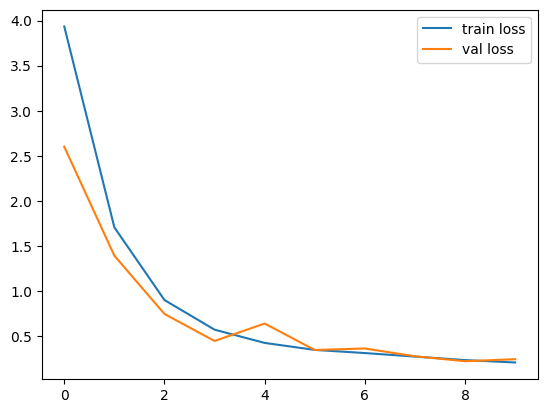

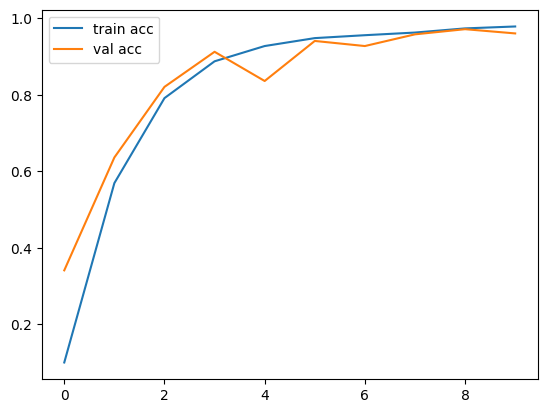

In [10]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [11]:
cnn.save('/content/SignatureBasedDocumentRetrieval/model_sign_classi.h5')

Documment similarity

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [31]:
%ls  # List files in the current directory


sample_data/  SignatureBasedDocumentRetrieval/


In [37]:
!ls /content/SignatureBasedDocumentRetrieval  # Replace with the actual path

Dataset  document_similarity.py  main_runner.py  model_sign_classi.h5  README.md  requirements.txt


In [47]:
import sys
sys.path.append('/content/SignatureBasedDocumentRetrieval/Document similarity.py')  # Replace '/path/to/directory' with the actual path to the directory containing document_similarity.py


In [81]:
import sys
# Assuming 'Document similarity.py' is directly within '/content/SignatureBasedDocumentRetrieval'
sys.path.append('/content/SignatureBasedDocumentRetrieval')

import document_similarity  # Now try importing again

In [82]:
import document_similarity

In [83]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import webbrowser
import document_similarity
import os


In [84]:

# Loading the trained model
model = load_model('/content/SignatureBasedDocumentRetrieval/model_sign_classi.h5')

In [85]:

# Input the image to predict
test_image = image.load_img('/content/SignatureBasedDocumentRetrieval/Dataset/input/PES1PG22CS045.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)

In [86]:

y_prob = model.predict(test_image)

1/1 [==============================] - 0s 72ms/step


In [87]:

# Getting the predicted class label
srn = np.argmax(y_prob[0])
srn = srn + 1  #offset 1

In [90]:

# fetching the document and printing the document_similarity
print()
print("The input signature matches with SRN ",srn)
print()
if srn <10:
    os.system('start ./Dataset/summarypdfs/PES1PG22CS00'+str(srn)+'.pdf')
else:
    os.system('start ./Dataset/summarypdfs/PES1PG22CS0'+str(srn)+'.pdf')

#document_similarity.print_similarity(srn)


The input signature matches with SRN  45

